In [3]:
import tensorflow as tf
from tensorflow import keras
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm 
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## Numpy and Scimage Method for Data 

In [4]:
img_height=512
img_width=512
channel=1
input_shape=(img_height,img_width,channel)

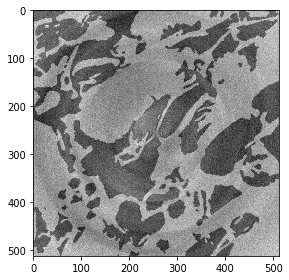

In [79]:
imshow("/Users/matthewavaylon/Data_G/input/image_0000/image_0000.png")

In [80]:
img_orig=imread("/Users/matthewavaylon/Data_G/Originals/image_0000/image_0000.png")
img_orig.shape

(512, 512)

In [81]:
img_input=imread("/Users/matthewavaylon/Data_G/input/image_0000/image_0000.png")
img_input.shape

(512, 512, 3)

## Data from "Original"

In [24]:
TRAIN_PATH = '/Users/matthewavaylon/Data_G/Originals/'
label_path= '/Users/matthewavaylon/Data_G/label2/'

In [25]:
train_ids = next(os.walk(TRAIN_PATH))[1]
train_ids=sorted(train_ids)

In [26]:
label_ids = next(os.walk(label_path))[1]
label_ids=sorted(label_ids)

In [30]:
l=imread('/Users/matthewavaylon/Data_G/label2/segmented_Gambier-0000/segmented_Gambier-0000.png')
l.shape

(512, 512, 4)

In [32]:
im_gray = cv2.imread('/Users/matthewavaylon/Data_G/label2/segmented_Gambier-0000/segmented_Gambier-0000.png', cv2.IMREAD_GRAYSCALE

SyntaxError: unexpected EOF while parsing (<ipython-input-32-e3fb1b07d9c7>, line 1)

In [9]:
X_train = np.zeros((len(train_ids), img_height, img_width,1), dtype=np.uint8)
Y_train = np.zeros((len(train_ids),img_height*img_width,2), dtype=np.uint8)

In [10]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + "/" + id_ + '.png') 
    img = np.expand_dims(img, axis =-1)
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img

100%|██████████| 512/512 [00:07<00:00, 68.11it/s]


In [11]:
for n, id_ in tqdm(enumerate(label_ids), total=len(label_ids)):   
    path = label_path + id_
    img = imread(path + "/" + id_ + '.png')
    img = resize(img, (img_height,img_width), mode='constant', preserve_range=True)
    gt = np.zeros([img_height,img_width,2])
    gt[:,:,0] = img.astype(int)
    gt[:,:,1] = (img==0).astype(int)
    #plt.figure()
    #plt.subplot(1,2,1)
    #plt.imshow(gt[:,:,0])
    #plt.subplot(1,2,2)
    #plt.imshow(gt[:,:,1])
    #plt.show()
    #img = np.expand_dims(img, axis =-1)
    #img2 = cv2.merge((img,img,img))
    #img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    Y_train[n] = gt.reshape([img_height*img_width,2])  #Fill empty X_train with values from img

100%|██████████| 512/512 [00:07<00:00, 72.36it/s]


## Data from "Original" without adjustments

In [12]:
TRAIN_PATH_ = '/Users/matthewavaylon/Data_G/Originals/'
label_path_= '/Users/matthewavaylon/Data_G/Labeled/'

In [13]:
train_ids_ = next(os.walk(TRAIN_PATH_))[1]
train_ids_=sorted(train_ids_)

In [14]:
label_ids_ = next(os.walk(label_path_))[1]
label_ids_=sorted(label_ids_)

In [15]:
X_train_ = np.zeros((len(train_ids_), img_height, img_width,1), dtype=np.uint8)
Y_train_ = np.zeros((len(train_ids_), img_height, img_width,1), dtype=np.uint8)

In [16]:
for n, id_ in tqdm(enumerate(train_ids_), total=len(train_ids_)):   
    path = TRAIN_PATH_ + id_
    img = imread(path + "/" + id_ + '.png') 
    img = np.expand_dims(img, axis =-1)
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train_[n] = img  #Fill empty X_train with values from img

100%|██████████| 512/512 [00:07<00:00, 69.06it/s]


In [17]:
for n, id_ in tqdm(enumerate(label_ids_), total=len(label_ids_)):   
    path = label_path_ + id_
    img = imread(path + "/" + id_ + '.png')
    img = np.expand_dims(img, axis =-1)
    #img2 = cv2.merge((img,img,img))
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    Y_train_[n] = img  #Fill empty X_train with values from img

100%|██████████| 512/512 [00:06<00:00, 79.89it/s]


In [30]:
X_train_[0].shape

(512, 512, 1)

In [31]:
Y_train_[0].shape

(512, 512, 1)

## Model

In [96]:
input_=tf.keras.layers.Input(shape=input_shape)
s = tf.keras.layers.Lambda(lambda x: x / 255)(input_)

In [97]:
c1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2), strides=2)(c1)

c2 = tf.keras.layers.Conv2D(filters=32,kernel_size= (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2),strides=2)(c2)
 
c3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2),strides=2)(c3)

c4 = tf.keras.layers.Conv2D(filters=128,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Conv2D(filters=128,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2),strides=2)(c4)


c5 = tf.keras.layers.Conv2D(filters=256,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Conv2D(filters=256,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

In [98]:
u1 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2, 2), strides=(2, 2), padding='same')(c5)
u1 = tf.keras.layers.concatenate([u1, c4])
c6 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u1)
c6 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2, 2), strides=(2, 2), padding='same')(c6)
u2 = tf.keras.layers.concatenate([u2, c3])
c7 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u2)
c7 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u3 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2, 2), strides=(2, 2), padding='same')(c7)
u3 = tf.keras.layers.concatenate([u3, c2])
c8 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u3)
c8 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u4 = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(2, 2), strides=(2, 2), padding='same')(c8)
u4 = tf.keras.layers.concatenate([u4, c1])
c9 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
c9 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

## Model with "Original"

In [99]:
outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='sigmoid')(c9)

In [100]:
out2 = tf.keras.layers.Reshape(target_shape=[img_height*img_width,2])(outputs)

In [101]:
opt=tf.keras.optimizers.Adam(lr=.001)

In [102]:
model = tf.keras.Model(inputs=input_, outputs=out2)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 512, 512, 1)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 512, 512, 16) 160         lambda_3[0][0]                   
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 512, 512, 16) 2320        conv2d_58[0][0]                  
____________________________________________________________________________________________

In [104]:
model.fit(X_train, Y_train, batch_size=32, epochs=5)

Train on 512 samples
Epoch 1/5
 64/512 [==>...........................] - ETA: 9:57 - loss: -1092.2631 - accuracy: 0.2128

KeyboardInterrupt: 

## Model with "Input"

In [51]:
img_height_=512
img_width_=512
channel_=3
input_shape_=(img_height_,img_width_,channel_)

In [53]:
input2=tf.keras.layers.Input(shape=input_shape_)
s_ = tf.keras.layers.Lambda(lambda x: x / 255)(input2)

In [54]:
c1_ = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s_)
c1_ = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1_)
p1_ = tf.keras.layers.MaxPooling2D((2, 2), strides=2)(c1_)

c2_ = tf.keras.layers.Conv2D(filters=32,kernel_size= (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1_)
c2_ = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2_)
p2_ = tf.keras.layers.MaxPooling2D((2, 2),strides=2)(c2_)
 
c3_ = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2_)
c3_ = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3_)
p3_ = tf.keras.layers.MaxPooling2D((2, 2),strides=2)(c3_)

c4_ = tf.keras.layers.Conv2D(filters=128,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3_)
c4_ = tf.keras.layers.Conv2D(filters=128,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4_)
p4_ = tf.keras.layers.MaxPooling2D((2, 2),strides=2)(c4_)


c5_ = tf.keras.layers.Conv2D(filters=256,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4_)
c5_ = tf.keras.layers.Conv2D(filters=256,  kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5_)

In [55]:
u1_ = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2, 2), strides=(2, 2), padding='same')(c5_)
u1_ = tf.keras.layers.concatenate([u1_, c4_])
c6_ = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u1_)
c6_ = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6_)
 
u2_ = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2, 2), strides=(2, 2), padding='same')(c6_)
u2_ = tf.keras.layers.concatenate([u2_, c3_])
c7_ = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u2_)
c7_ = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7_)

u3_ = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2, 2), strides=(2, 2), padding='same')(c7_)
u3_ = tf.keras.layers.concatenate([u3_, c2_])
c8_ = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u3_)
c8_ = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8_)

u4_ = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(2, 2), strides=(2, 2), padding='same')(c8_)
u4_ = tf.keras.layers.concatenate([u4_, c1_])
c9_ = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4_)
c9_ = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9_)

In [73]:
outputs_ = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9_)

In [74]:
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=.1)

In [75]:
model_ = tf.keras.Model(inputs=input2, outputs=outputs_)
model_.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model_.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 512, 512, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 512, 512, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 512, 512, 16) 2320        conv2d_19[0][0]                  
____________________________________________________________________________________________

In [72]:
model_.fit(X_train_, Y_train_, batch_size=32, epochs=5)

Train on 512 samples
Epoch 1/5
 64/512 [==>...........................] - ETA: 9:43 - loss: 46.6260 - accuracy: 0.3227 

KeyboardInterrupt: 

In [12]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
import glob
import skimage.io as io
import skimage.transform as trans
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

Using TensorFlow backend.


## UNet from Git

In [38]:
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = Input(input_size)
    s_ = Lambda(lambda x: x / 255)(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(s_)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [39]:
model_g=unet()
model_g.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_g.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512, 512, 1)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 512, 512, 64) 640         lambda_1[0][0]                   
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 512, 512, 64) 36928       conv2d_121[0][0]                 
____________________________________________________________________________________________

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [ ]:
out2 = tf.keras.layers.Reshape(target_shape=[img_height*img_width,2])(outputs)

In [40]:
model_g.fit(X_train_, Y_train_, batch_size=2, epochs=5)

Epoch 1/5
  6/512 [..............................] - ETA: 1:15:56 - loss: -484.9926 - accuracy: 0.0779

KeyboardInterrupt: 

### Test of a different unet

In [1]:
from keras_unet.models import vanilla_unet

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [18]:
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=.1)

In [22]:
model_t = vanilla_unet(input_shape=(512, 512, 1))
model_t.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model_t.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 510, 510, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 508, 508, 64) 36928       conv2d_38[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 254, 254, 64) 0           conv2d_39[0][0]                  
____________________________________________________________________________________________

In [21]:
model_t.fit(X_train_,Y_train_,batch_size=2, epochs=1)

ValueError: A target array with shape (512, 512, 512, 1) was passed for an output of shape (None, 324, 324, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

## Another one

In [ ]:
def unet_mini(n_classes, input_height, input_width):
    img_input = Input(shape=(input_height, input_width, 1))

    conv1 = Conv2D(32, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(img_input)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(32, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2), data_format=IMAGE_ORDERING)(conv1)

    conv2 = Conv2D(64, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(64, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2), data_format=IMAGE_ORDERING)(conv2)

    conv3 = Conv2D(128, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(128, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(conv3)

    up1 = concatenate([UpSampling2D((2, 2), data_format=IMAGE_ORDERING)(
        conv3), conv2], axis=3)
    conv4 = Conv2D(64, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(up1)
    #conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(64, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(conv4)

    up2 = concatenate([UpSampling2D((2, 2), data_format=IMAGE_ORDERING)(
        conv4), conv1], axis=3)
    conv5 = Conv2D(32, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(up2)
    #conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(32, (3, 3), data_format=IMAGE_ORDERING,
                   activation='relu', padding='same')(conv5)

    o = Conv2D(n_classes, (1, 1), data_format=IMAGE_ORDERING,
               padding='same')(conv5)

    model = get_segmentation_model(img_input, o)
    model.model_name = "unet_mini"
    return model